In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.stats import ks_2samp

In [2]:
x_train=pd.read_csv('C:\\Users\\arind\\OneDrive\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\PD_LGD_EAD\\x_train.csv',index_col=0)
x_test=pd.read_csv('C:\\Users\\arind\\OneDrive\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\PD_LGD_EAD\\x_test.csv',index_col=0)
y_train=pd.read_csv('C:\\Users\\arind\\OneDrive\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\PD_LGD_EAD\\y_train.csv',index_col=0)
y_test=pd.read_csv('C:\\Users\\arind\\OneDrive\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\PD_LGD_EAD\\y_test.csv',index_col=0)              

In [3]:
ref_categories=['grade_G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status_Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status_f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [4]:
#To show all the columns
pd.options.display.max_columns=None

In [5]:
x_train=x_train.drop(ref_categories,axis=1)
x_train.head()

grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  \
427211        1        0        0        0        0        0   
206088        0        0        1        0        0        0   
136020        1        0        0        0        0        0   
412305        0        0        0        1        0        0   
36159         0        0        1        0        0        0   

        home_ownership_MORTGAGE  home_ownership_OWN  \
427211                        1                   0   
206088                        1                   0   
136020                        1                   0   
412305                        0                   0   
36159                         1                   0   

        verification_status_Not Verified  verification_status_Source Verified  \
427211                                 0                                    1   
206088                                 1                                    0   
136020                                 0                                    0   
412305                                 0                                    1   
36159                                  0                                    0   

        purpose_credit_card  purpose_debt_consolidation  \
427211                    0                           1   
206088                    0                           1   
136020                    0                           1   
412305                    0                           1   
36159                     0                           0   

        purpose:oth__med__vacation  purpose:major_purch__car__home_impr  \
427211                           0                                    0   
206088                           0                                    0   
136020                           0                                    0   
412305                           0                                    0   
36159                            0                                    0   

        addr_state_CA  addr_state_NY  addr_state_TX  addr_state:NM_VA  \
427211              0              0              0                 0   
206088              0              0              0                 0   
136020              0              0              0                 0   
412305              0              0              0                 0   
36159               1              0              0                 0   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
427211                             0                       0   
206088                             0                       1   
136020                             0                       0   
412305                             0                       0   
36159                              0                       0   

        addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  \
427211                          0                          0   
206088                          0                          0   
136020                          0                          0   
412305                          0                          1   
36159                           0                          0   

        addr_state:GA_WA_OR  addr_state:WI_MT  addr_state:IL_CT  \
427211                    0                 0                 0   
206088                    0                 0                 0   
136020                    1                 0                 0   
412305                    0                 0                 0   
36159                     0                 0                 0   

        addr_state:KS_SC_CO_VT_AK_MS  addr_state:WV_NH_WY_DC_ME_ID  \
427211                             1                             0   
206088                             0                             0   
136020                             0                             0   
412305                             0                             0   
36159                              0 

In [6]:
x_test=x_test.drop(ref_categories,axis=1)
x_test.head()

grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  \
362514        0        0        1        0        0        0   
288564        0        0        0        0        1        0   
213591        0        0        1        0        0        0   
263083        0        0        1        0        0        0   
165001        1        0        0        0        0        0   

        home_ownership_MORTGAGE  home_ownership_OWN  \
362514                        1                   0   
288564                        1                   0   
213591                        1                   0   
263083                        1                   0   
165001                        1                   0   

        verification_status_Not Verified  verification_status_Source Verified  \
362514                                 0                                    0   
288564                                 0                                    0   
213591                                 0                                    0   
263083                                 0                                    1   
165001                                 0                                    0   

        purpose_credit_card  purpose_debt_consolidation  \
362514                    0                           0   
288564                    1                           0   
213591                    0                           1   
263083                    0                           1   
165001                    0                           1   

        purpose:oth__med__vacation  purpose:major_purch__car__home_impr  \
362514                           0                                    1   
288564                           0                                    0   
213591                           0                                    0   
263083                           0                                    0   
165001                           0                                    0   

        addr_state_CA  addr_state_NY  addr_state_TX  addr_state:NM_VA  \
362514              1              0              0                 0   
288564              0              0              0                 0   
213591              0              0              0                 0   
263083              0              0              0                 0   
165001              0              0              0                 0   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
362514                             0                       0   
288564                             0                       0   
213591                             0                       1   
263083                             0                       0   
165001                             0                       0   

        addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  \
362514                          0                          0   
288564                          0                          1   
213591                          0                          0   
263083                          1                          0   
165001                          1                          0   

        addr_state:GA_WA_OR  addr_state:WI_MT  addr_state:IL_CT  \
362514                    0                 0                 0   
288564                    0                 0                 0   
213591                    0                 0                 0   
263083                    0                 0                 0   
165001                    0                 0                 0   

        addr_state:KS_SC_CO_VT_AK_MS  addr_state:WV_NH_WY_DC_ME_ID  \
362514                             0                             0   
288564                             0                             0   
213591                             0                             0   
263083                             0                             0   
165001                             0 

In [7]:
pd.options.display.max_rows=None

In [8]:
#add intercept to both x_train & x_test
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [9]:
l=sm.Logit(y_train,x_train)
r=l.fit()

Optimization terminated successfully.
         Current function value: 0.316838
         Iterations 7


In [10]:
print(r.summary())

                           Logit Regression Results                           
Dep. Variable:               good_bad   No. Observations:               373028
Model:                          Logit   Df Residuals:                   372923
Method:                           MLE   Df Model:                          104
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                 0.07184
Time:                        21:54:10   Log-Likelihood:            -1.1819e+05
converged:                       True   LL-Null:                   -1.2734e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.6139      0.480     -5.448      0.000      -3.554      -1.674
grade_A                                 1.1416      0.09

In [11]:
#remove those variables whose p_value>0.05 which are statistically insignificant
x_train=x_train.drop(['delinq_2yrs:0','delinq_2yrs:1-3','pub_rec:3-4','pub_rec:>=5','total_acc:28-51','total_acc:>=52'],axis=1)
x_test=x_test.drop(['delinq_2yrs:0','delinq_2yrs:1-3','pub_rec:3-4','pub_rec:>=5','total_acc:28-51','total_acc:>=52'],axis=1)

In [12]:
l=sm.Logit(y_train,x_train)
r=l.fit()

Optimization terminated successfully.
         Current function value: 0.316849
         Iterations 7


In [13]:
print(r.summary())

                           Logit Regression Results                           
Dep. Variable:               good_bad   No. Observations:               373028
Model:                          Logit   Df Residuals:                   372929
Method:                           MLE   Df Model:                           98
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                 0.07181
Time:                        21:54:15   Log-Likelihood:            -1.1819e+05
converged:                       True   LL-Null:                   -1.2734e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.5550      0.477     -5.359      0.000      -3.489      -1.621
grade_A                                 1.1410      0.09

In [14]:
y_train_prob=r.predict(x_train)
y_test_prob=r.predict(x_test)

y_train_prob_pred=(y_train_prob>0.9).astype(int)
y_test_prob_pred=(y_test_prob>0.9).astype(int)

In [15]:
confusion_matrix(y_train,y_train_prob_pred)

array([[ 28349,  11770],
       [139879, 193030]], dtype=int64)

In [16]:
confusion_matrix(y_test,y_test_prob_pred)

array([[ 7170,  2847],
       [35022, 48218]], dtype=int64)

In [17]:
print(classification_report(y_train,y_train_prob_pred))

              precision    recall  f1-score   support

           0       0.17      0.71      0.27     40119
           1       0.94      0.58      0.72    332909

    accuracy                           0.59    373028
   macro avg       0.56      0.64      0.50    373028
weighted avg       0.86      0.59      0.67    373028



In [18]:
print(classification_report(y_test,y_test_prob_pred))

              precision    recall  f1-score   support

           0       0.17      0.72      0.27     10017
           1       0.94      0.58      0.72     83240

    accuracy                           0.59     93257
   macro avg       0.56      0.65      0.50     93257
weighted avg       0.86      0.59      0.67     93257



In [19]:
roc_auc_score1=roc_auc_score(y_train,y_train_prob)
roc_auc_score1

0.698963938500426

In [20]:
roc_auc_score2=roc_auc_score(y_test,y_test_prob)
roc_auc_score2

0.7034715047369977

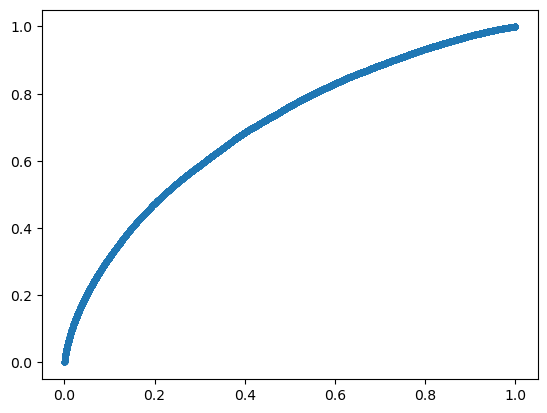

In [21]:
fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr,marker='.')

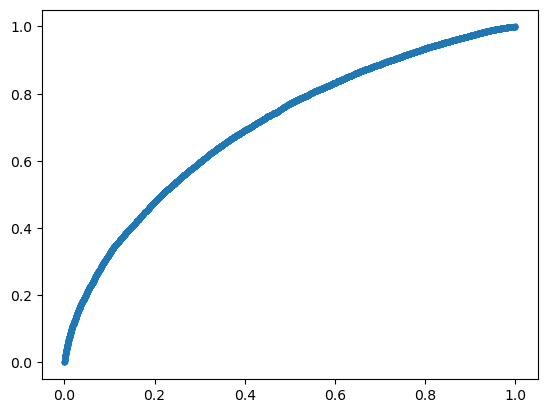

In [22]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr,marker='.')

In [23]:
#validation through Gini 
gini=2*roc_auc_score2-1
gini

0.4069430094739954

In [29]:
#validation through Kolmogorov-Smirnov
y_test_series = y_test['good_bad'] if isinstance(y_test, pd.DataFrame) else y_test
pred_pos = y_test_prob_pred[y_test_series == 1]
pred_neg = y_test_prob_pred[y_test_series == 0]

In [31]:
ks_2samp(pred_pos, pred_neg)

KstestResult(statistic=0.295047945163093, pvalue=0.0, statistic_location=0, statistic_sign=-1)

In [32]:
#calculate credit score
#max score =850
#min score=300
#offset =(850+300)/2=575
#Factor: 28.85 for a 20-point change per doubling of the odds of default.

In [33]:
log_odds=np.log((1-y_test_prob)/y_test_prob)

In [38]:
log_odds

362514   -2.528983
288564   -1.729752
213591   -2.053288
263083   -2.803481
165001   -3.439158
82511    -1.502077
24671    -1.675630
97373    -1.011092
44058    -3.182107
351326   -3.375817
176798   -1.794432
2253     -1.814135
11493    -1.511443
247866   -1.885497
465694   -2.735425
440413   -2.356099
340144   -3.338571
145732   -2.956195
171649   -2.218866
135808   -2.837869
42139    -1.143712
196634   -0.990374
41142    -1.217064
310417   -2.209362
274665   -1.809167
269466   -2.818688
1554     -1.380291
455384   -2.930511
121647   -1.875919
261521   -2.358643
259632   -2.175289
115179   -1.186097
93531    -1.488672
93946    -2.445721
278174   -2.701547
314251   -3.744925
317118   -3.634049
106698   -0.981889
390216   -2.522696
396449   -2.093703
62711    -2.281245
157629   -1.630022
438202   -2.460486
327911   -2.483594
422959   -1.869283
235420   -3.751492
124626   -1.548814
156809   -2.683126
5109     -1.343221
117953   -0.900911
397622   -1.747084
280382   -2.621161
111325   -1.

In [47]:
#credit_scores = offset + factor * log_odds
credit_scores=600+28.85*log_odds
credit_scores = np.clip(credit_scores, 300, 900)
credit_scores

362514    527.038840
288564    550.096669
213591    540.762635
263083    519.119571
165001    500.780302
82511     556.665071
24671     551.658065
97373     570.829991
44058     508.196207
351326    502.607691
176798    548.230642
2253      547.662209
11493     556.394875
247866    545.603408
465694    521.082995
440413    532.026546
340144    503.682217
145732    514.713763
171649    535.985719
135808    518.127476
42139     567.003914
196634    571.427714
41142     564.887717
310417    536.259894
274665    547.805519
269466    518.680849
1554      560.178605
455384    515.454763
121647    545.879744
261521    531.953161
259632    537.242903
115179    565.781089
93531     557.051822
93946     529.440963
278174    522.060371
314251    491.958901
317118    495.157683
106698    571.672503
390216    527.220209
396449    539.596675
62711     534.186089
157629    552.973857
438202    529.014974
327911    528.348319
422959    546.071176
235420    491.769453
124626    555.316730
156809    522

In [48]:
x_test['credit_scores']=credit_scores

In [49]:
x_test.head()

const  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  \
362514    1.0        0        0        1        0        0        0   
288564    1.0        0        0        0        0        1        0   
213591    1.0        0        0        1        0        0        0   
263083    1.0        0        0        1        0        0        0   
165001    1.0        1        0        0        0        0        0   

        home_ownership_MORTGAGE  home_ownership_OWN  \
362514                        1                   0   
288564                        1                   0   
213591                        1                   0   
263083                        1                   0   
165001                        1                   0   

        verification_status_Not Verified  verification_status_Source Verified  \
362514                                 0                                    0   
288564                                 0                                    0   
213591                                 0                                    0   
263083                                 0                                    1   
165001                                 0                                    0   

        purpose_credit_card  purpose_debt_consolidation  \
362514                    0                           0   
288564                    1                           0   
213591                    0                           1   
263083                    0                           1   
165001                    0                           1   

        purpose:oth__med__vacation  purpose:major_purch__car__home_impr  \
362514                           0                                    1   
288564                           0                                    0   
213591                           0                                    0   
263083                           0                                    0   
165001                           0                                    0   

        addr_state_CA  addr_state_NY  addr_state_TX  addr_state:NM_VA  \
362514              1              0              0                 0   
288564              0              0              0                 0   
213591              0              0              0                 0   
263083              0              0              0                 0   
165001              0              0              0                 0   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:UT_KY_AZ_NJ  \
362514                             0                       0   
288564                             0                       0   
213591                             0                       1   
263083                             0                       0   
165001                             0                       0   

        addr_state:AR_MI_PA_OH_MN  addr_state:RI_MA_DE_SD_IN  \
362514                          0                          0   
288564                          0                          1   
213591                          0                          0   
263083                          1                          0   
165001                          1                          0   

        addr_state:GA_WA_OR  addr_state:WI_MT  addr_state:IL_CT  \
362514                    0                 0                 0   
288564                    0                 0                 0   
213591                    0                 0                 0   
263083                    0                 0                 0   
165001                    0                 0                 0   

        addr_state:KS_SC_CO_VT_AK_MS  addr_state:WV_NH_WY_DC_ME_ID  \
362514                             0                             0   
288564                             0                             0   
213591                             0                             0   
263083                             0                             

592.63010230974